### Load the results from the temp folder

In [1]:
from classes import *
from datetime import datetime
from mayors import *
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.lines import Line2D

In [2]:
filename = "2020_6_5"

foldername = "temp"
subfolder = "experiments"
target = os.path.join(foldername,subfolder)

today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)

if not os.path.exists(foldername):
    os.mkdir(foldername)
    if not os.path.exists(target):
        os.mkdir(target)

experiments = pickle.load(open( os.path.join(target,"experiment_" + filename + ".p"), "rb") ) 
print(len(experiments))

600


In [3]:
#Just test if the output looks ok
experiment = experiments[0]
experiment

OrderedDict([('model_name', 'Rotty'),
             ('Model', Rotty 
              -----------
              allFloodProtection: 
              No 3.5; Dike 4.5;  
              -----------
              allResidentialArea: 
              Area_A Protected by:['No']
              Area_B Protected by:['Dike']
              
              Parameters : 
              {'alarming_conditions': OrderedDict([(1, ['Major flood', 40]), (0, ['Small flood', 20]), (-0.2, ['Near miss', 10]), (-0.4, ['Major wake-up', 7]), (-1, ['Minor wake-up', 5]), (-10, ['Nothing happens', 0])]), 'Gumbel': OrderedDict([('mu', 2.33), ('beta', 0.234)]), 'Bayesian_weighing_constants': OrderedDict([('a_noflood', 1), ('a_flood', 0.1), ('b_noflood', 0.04), ('b_flood', 1), ('c', 0), ('d', 0.2)]), 'I_experience_interp': {'xp': [0, 0.5], 'fp': [0, 1]}}),
             ('SurgeLevel', LeBars_2017_RCP45_05__0),
             ('Mayor', <mayors.Kroket at 0x2138ae05d60>)])

In [4]:
threshold = 50

results = pd.DataFrame()

for i,experiment in enumerate(experiments):
    full = experiment['SurgeLevel'].name
    #draw all the data about the sea level rise scenario
    SurgeHeight = full.split("__")[1]
    author = full.split("__")[0].split('_')[0]
    RCP = full.split("__")[0].split('_')[2]
    RCP_CI = full.split("__")[0].split('_')[3]
    
    #draw the name of the mayor
    mayor = experiment['Mayor'].get_name()
    
    #evaluate Area_A:
    #variable = experiment['Model'].allResidentialArea[0].protection_level_rp
    variable = experiment['Model'].allResidentialArea[1].trust_t
    #next(value for value in variable if value<=threshold) #this finds the value itself
    try:
        index = next(x[0] for x in enumerate(variable) if x[1] <= threshold) #this finds the index corresponding to the value
        year = experiment['SurgeLevel'].years[index]
    except:
        year = np.NaN
        #print('Condition not found')
    #print(year)
    results = results.append(pd.Series(data=[author,RCP,RCP_CI,mayor,year,SurgeHeight],index=['author','RCP','CI','Mayor','SETP_year','SurgeHeight'],name=i))
results[results.Mayor == 'Berry Kroket']

,CI,Mayor,RCP,SETP_year,SurgeHeight,author
0,05,Berry Kroket,RCP45,NaN,0,LeBars
4,05,Berry Kroket,RCP45,NaN,1,LeBars
8,05,Berry Kroket,RCP45,NaN,2,LeBars
12,05,Berry Kroket,RCP45,NaN,3,LeBars
16,05,Berry Kroket,RCP45,NaN,4,LeBars
...,...,...,...,...,...,...
580,83,Berry Kroket,RCP85,NaN,5,SROCC
584,83,Berry Kroket,RCP85,NaN,6,SROCC
588,83,Berry Kroket,RCP85,NaN,7,SROCC
592,83,Berry Kroket,RCP85,NaN,8,SROCC


In [5]:
df = results.copy()
df.head()

,CI,Mayor,RCP,SETP_year,SurgeHeight,author
0,05,Berry Kroket,RCP45,NaN,0,LeBars
1,05,Mr. H. Economicus,RCP45,NaN,0,LeBars
2,05,Sentiment,RCP45,NaN,0,LeBars
3,05,Lawkeeper,RCP45,NaN,0,LeBars
4,05,Berry Kroket,RCP45,NaN,1,LeBars


In [6]:
df['keyvalue'] = df['author'] + "_" + df['RCP'] + "_" + df['CI'] #create a new column with a composed key
df

,CI,Mayor,RCP,SETP_year,SurgeHeight,author,keyvalue
0,05,Berry Kroket,RCP45,NaN,0,LeBars,LeBars_RCP45_05
1,05,Mr. H. Economicus,RCP45,NaN,0,LeBars,LeBars_RCP45_05
2,05,Sentiment,RCP45,NaN,0,LeBars,LeBars_RCP45_05
3,05,Lawkeeper,RCP45,NaN,0,LeBars,LeBars_RCP45_05
4,05,Berry Kroket,RCP45,NaN,1,LeBars,LeBars_RCP45_05
...,...,...,...,...,...,...,...
595,83,Lawkeeper,RCP85,NaN,8,SROCC,SROCC_RCP85_83
596,83,Berry Kroket,RCP85,NaN,9,SROCC,SROCC_RCP85_83
597,83,Mr. H. Economicus,RCP85,NaN,9,SROCC,SROCC_RCP85_83
598,83,Sentiment,RCP85,NaN,9,SROCC,SROCC_RCP85_83


In [7]:
mapping = OrderedDict({ #map the unique key-combinations to a y-value
    'SROCC_RCP26_17' : 0.7,
    'SROCC_RCP26_50' : 1,
    'SROCC_RCP26_83' : 1.3,
    'SROCC_RCP45_17' : 1.7,
    'SROCC_RCP45_50' : 2,
    'SROCC_RCP45_83' : 2.3,
    'SROCC_RCP85_17' : 2.7,
    'SROCC_RCP85_50' : 3,
    'SROCC_RCP85_83' : 3.3,
    'LeBars_RCP45_05' : 3.7,
    'LeBars_RCP45_med' : 4,
    'LeBars_RCP45_95' : 4.3,
    'LeBars_RCP85_05' : 4.7,
    'LeBars_RCP85_med' : 5,
    'LeBars_RCP85_95' : 5.3,
})

In [9]:
df['y-value'] = df['keyvalue'].apply(mapping.get)
df.head()
df.CI.unique()

array(['05', '95', 'med', '17', '50', '83'], dtype=object)

In [10]:
#for multiple conditions indexing: & and; | or; ~ not
#dfA = df[(df.CI == '50') | (df.CI == 'med')] #throw the tails of the distribution away for now!
dfA = df[df.keyvalue.isin(list(mapping.keys()))]
dfA.index = dfA.SETP_year
dfA

,CI,Mayor,RCP,SETP_year,SurgeHeight,author,keyvalue,y-value
SETP_year,,,,,,,,
NaN,05,Berry Kroket,RCP45,NaN,0,LeBars,LeBars_RCP45_05,3.7
NaN,05,Mr. H. Economicus,RCP45,NaN,0,LeBars,LeBars_RCP45_05,3.7
NaN,05,Sentiment,RCP45,NaN,0,LeBars,LeBars_RCP45_05,3.7
NaN,05,Lawkeeper,RCP45,NaN,0,LeBars,LeBars_RCP45_05,3.7
NaN,05,Berry Kroket,RCP45,NaN,1,LeBars,LeBars_RCP45_05,3.7
...,...,...,...,...,...,...,...,...
NaN,83,Lawkeeper,RCP85,NaN,8,SROCC,SROCC_RCP85_83,3.3
NaN,83,Berry Kroket,RCP85,NaN,9,SROCC,SROCC_RCP85_83,3.3
NaN,83,Mr. H. Economicus,RCP85,NaN,9,SROCC,SROCC_RCP85_83,3.3


In [11]:
dfA[dfA.SETP_year >= 0]

,CI,Mayor,RCP,SETP_year,SurgeHeight,author,keyvalue,y-value
SETP_year,,,,,,,,
2093.0,95,Berry Kroket,RCP45,2093.0,0,LeBars,LeBars_RCP45_95,4.3
2093.0,95,Sentiment,RCP45,2093.0,0,LeBars,LeBars_RCP45_95,4.3
2096.0,95,Berry Kroket,RCP45,2096.0,1,LeBars,LeBars_RCP45_95,4.3
2096.0,95,Sentiment,RCP45,2096.0,1,LeBars,LeBars_RCP45_95,4.3
2093.0,95,Berry Kroket,RCP45,2093.0,2,LeBars,LeBars_RCP45_95,4.3
...,...,...,...,...,...,...,...,...
2096.0,med,Sentiment,RCP85,2096.0,7,LeBars,LeBars_RCP85_med,5.0
2094.0,med,Berry Kroket,RCP85,2094.0,8,LeBars,LeBars_RCP85_med,5.0
2094.0,med,Sentiment,RCP85,2094.0,8,LeBars,LeBars_RCP85_med,5.0


(0.0, 1.0, 0.0, 1.0)

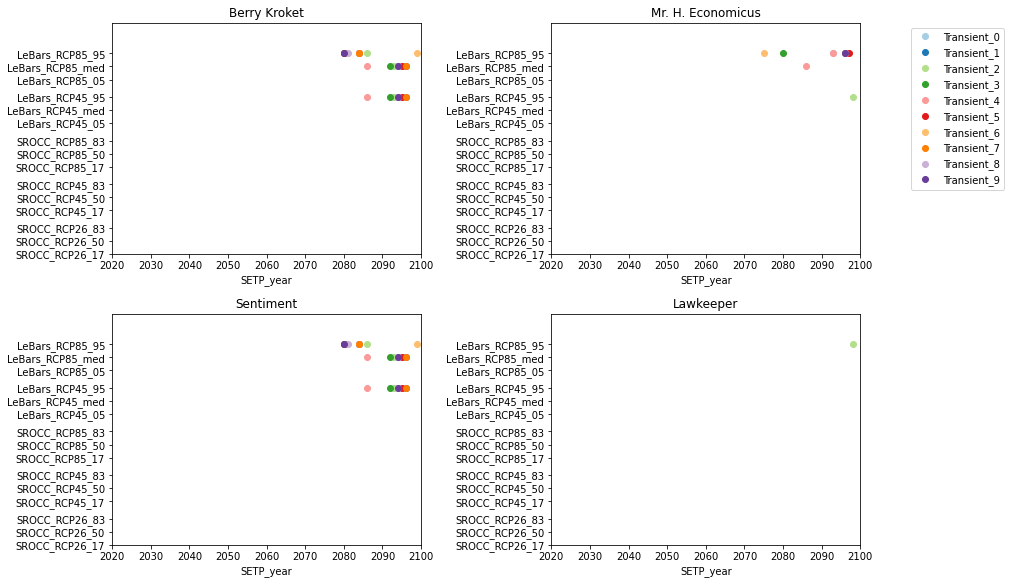

In [12]:
#fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8),constrained_layout=True)
#PREPARE THE GRID
fig = plt.figure(constrained_layout=True,figsize=(14,8))
gs = fig.add_gridspec(2,3,width_ratios = [5,5,2])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0,2])

asjes = [ax1,ax2,ax3,ax4]

#PREPARE THE PLOT
keys = list(range(0,10))
keys = [str(i) for i in keys]
colors3 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'] #from the visualise scenarios.ipynb
SurgeHeights = dict(zip(keys,colors3))

for j,mayor in enumerate(['Berry Kroket','Mr. H. Economicus','Sentiment','Lawkeeper']):
    dfB = dfA[dfA.Mayor == mayor]
    
    for SH in SurgeHeights:
        dfB[dfB.SurgeHeight == SH]['y-value'].plot(ax=asjes[j],color=SurgeHeights[SH],marker='o',linestyle='None')


    asjes[j].set_xlim(2020,2100)
    asjes[j].set_ylim(1,6)
    asjes[j].set_yticks([mapping[key] for key in list(mapping.keys())])
    asjes[j].set_yticklabels(list(mapping.keys()))
    asjes[j].set_title(mayor)

    #PREPARE THE LEGEND
    legend_elements = []
    
    for SH in SurgeHeights:
        legend_elements.append(Line2D([0],[0],marker='o',color=SurgeHeights[SH],label='Transient_'+SH,linestyle='None'))
    
ax5.legend(handles=legend_elements)
ax5.axis('off')

In [13]:
fig.savefig(os.path.join('Visualisations','SETP_Area_B_50%trust.png'))

In [70]:
SurgeHeights

{'0': '#a6cee3',
 '1': '#1f78b4',
 '2': '#b2df8a',
 '3': '#33a02c',
 '4': '#fb9a99',
 '5': '#e31a1c',
 '6': '#fdbf6f',
 '7': '#ff7f00',
 '8': '#cab2d6',
 '9': '#6a3d9a'}

In [89]:
a = [i for i in list(mapping.keys())]
new = []
for i in a:
    print(i.split('_')[2])
    if ('83' or '05' or '95') in i.split('_')[2]: #for the cases for which you don't want to show labels
        print(i)
        new.append(i)
new

17
50
83
SROCC_RCP26_83
17
50
83
SROCC_RCP45_83
17
50
83
SROCC_RCP85_83
05
med
95
05
med
95


['SROCC_RCP26_83', 'SROCC_RCP45_83', 'SROCC_RCP85_83']